In [14]:
# Initial imports
import pandas as pd
import yfinance as yf
import hvplot.pandas
import pandas_datareader as pdr
import matplotlib.pyplot as plot
import seaborn as sns
from scipy import stats
from pathlib import Path
import numpy as np
from MCForecastTools import MCSimulation
%matplotlib inline
# Set the path of the CSV files
riskfreerate_path= Path("Resources/risk_free_rate.csv")
# Read in data
risk_free_rate = pd.read_csv(riskfreerate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [15]:
#Here we are fetching all the initial ticker data 
# Fetch high growth ticker data
aapl = yf.Ticker("AAPL")
tsla = yf.Ticker("TSLA")
nke = yf.Ticker("NKE")
amzn = yf.Ticker("AMZN")
wmt = yf.Ticker("WMT")
# Fetch low volatility ticker data
ldos = yf.Ticker("LDOS")
incy = yf.Ticker("INCY")
nbix = yf.Ticker("NBIX")
ko = yf.Ticker("KO")
aiz = yf.Ticker("AIZ")

In [16]:
# get historical market data for high growth ticker data
hist_appl = aapl.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_tsla = tsla.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_nke = nke.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_amzn = amzn.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_wmt = wmt.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
# get historical market data for low volatility ticker data
hist_ldos = ldos.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_incy = incy.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_nbix = nbix.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_ko = ko.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_aiz = aiz.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])


In [17]:
#Joining all historical data
his_stock_data = pd.concat([hist_appl, hist_tsla, hist_nke, hist_amzn, hist_wmt, hist_ldos, hist_incy, hist_nbix, hist_ko, hist_aiz], axis = 1, 
                           join="inner", keys=["APPL", "TSLA", "NKE", "AMZN", "WMT", "IDOS", "INCY", "NBIX", "KO", "AIZ"])
his_stock_data = his_stock_data.rename(columns={'Close': ''})

his_stock_data

,APPL,TSLA,NKE,AMZN,WMT,IDOS,INCY,NBIX,KO,AIZ
,,,,,,,,,,
Date,,,,,,,,,,
2010-06-29,7.811648,1.592667,14.751132,5.430500,36.921970,21.797016,11.240000,5.520000,17.239727,27.268595
2010-06-30,7.670158,1.588667,14.616974,5.463000,36.295284,21.693329,11.070000,5.600000,17.167795,27.120110
2010-07-01,7.577148,1.464000,14.729492,5.548000,36.499142,21.447115,10.560000,5.730000,17.136972,26.971615
2010-07-02,7.530189,1.280000,14.684051,5.457000,36.242443,21.291611,10.720000,5.700000,17.143822,26.721516
2010-07-06,7.581721,1.074000,14.543404,5.503000,36.672798,21.382322,10.760000,5.360000,17.273989,26.877813
...,...,...,...,...,...,...,...,...,...,...
2022-09-27,151.759995,282.940002,96.290001,114.410004,130.949997,88.199997,66.440002,101.360001,56.380001,147.460007
2022-09-28,149.839996,287.809998,98.699997,118.010002,133.110001,88.930000,67.660004,102.830002,56.980000,149.460007


In [18]:
# Calculate daily returns for each portfolio
pct_stock_data = his_stock_data.pct_change().dropna()
all_portfolios_returns = pd.concat([pct_stock_data, risk_free_rate], axis="columns", join="inner" )
all_portfolios_returns.tail()

,"(APPL, )","(TSLA, )","(NKE, )","(AMZN, )","(WMT, )","(IDOS, )","(INCY, )","(NBIX, )","(KO, )","(AIZ, )",rf_rate
Date,,,,,,,,,,,
2020-11-27,0.004826,0.020488,-0.009518,0.003224,-0.001515,-0.003507,0.025752,0.004626,-0.004345,-0.008376,0.000010
2020-11-30,0.021100,-0.031002,0.003352,-0.008544,0.007849,-0.015448,0.015496,-0.006488,-0.013196,-0.034905,0.000009
2020-12-01,0.030827,0.030233,0.005494,0.016427,-0.000981,0.009335,0.010409,-0.001159,0.008527,0.017348,0.000010
2020-12-02,0.002934,-0.027259,0.001034,-0.005140,-0.013889,0.014365,-0.036877,0.024676,0.001345,0.001675,0.000010
2020-12-03,-0.001137,0.043177,0.010179,-0.005244,-0.008105,-0.002037,0.007658,0.016466,0.012857,0.004560,0.000009


In [19]:
# Calculate Sharpe Ratio
sharpe_ratios = ((all_portfolios_returns.mean()-all_portfolios_returns['rf_rate'].mean()) * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios_df = pd.DataFrame(sharpe_ratios)
sharpe_ratios_df.columns = ["Sharpe Ratio"]
sharpe_ratios_df.drop

<bound method DataFrame.drop of           Sharpe Ratio
(APPL, )      1.002513
(TSLA, )      1.062364
(NKE, )       0.892881
(AMZN, )      1.110321
(WMT, )       0.678359
(IDOS, )      0.600419
(INCY, )      0.617338
(NBIX, )      0.746259
(KO, )        0.565434
(AIZ, )       0.650369
rf_rate       0.000000>

<AxesSubplot:title={'center':'Sharpe Ratios'}>

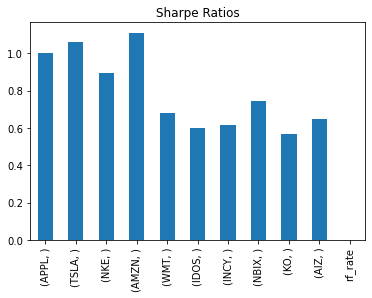

In [20]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [27]:
tickers_list = ["AAPL", "TSLA", "NKE", "AMZN", "WMT", "LDOS", "INCY", "NBIX", "KO", "AIZ"]
risk_df = []

for ticker in tickers_list:
    result = yf.Ticker(ticker).info
    row_items = [result['symbol'], result['currentRatio'], result['quickRatio'], result['priceToBook'], result['beta']]
    risk_df.append(row_items)
    

risk_df = pd.DataFrame(risk_df, columns=['symbol', 'Current Ratio', 'Quick Ratio', 'Price To Book', 'Beta'])

In [28]:
risk_df

,symbol,Current Ratio,Quick Ratio,Price To Book,Beta
0,AAPL,0.865,0.697,39.459835,1.234119
1,TSLA,1.431,0.968,20.810440,2.186576
2,NKE,2.645,1.542,8.458796,1.028765
3,AMZN,0.953,0.679,8.980161,1.333200
4,WMT,0.842,0.215,4.650665,0.528965
5,LDOS,0.903,0.707,3.106481,0.751897
6,INCY,3.913,3.675,3.738323,0.660407
7,NBIX,3.568,3.246,7.167708,0.545745
8,KO,1.127,0.785,11.997035,0.557684
9,AIZ,0.432,0.145,1.458628,0.550021


In [26]:
risk_df.hvplot.bar(stacked=False, height=500, rot=60)

:Bars   [index,Variable]   (value)

In [21]:
all_portfolios_returns_df = pd.concat([risk_df, sharpe_ratios_df], axis="columns", join="outer" )

In [22]:
all_portfolios_returns_df

,symbol,MarketCap,Current Ratio,Quick Ratio,Price To Book,Beta,Sharpe Ratio
0,AAPL,2.289285e+12,0.865,0.697,39.459835,1.234119,NaN
1,TSLA,7.595531e+11,1.431,0.968,20.810440,2.186576,NaN
2,NKE,1.339550e+11,2.645,1.542,8.458796,1.028765,NaN
3,AMZN,1.180539e+12,0.953,0.679,8.980161,1.333200,NaN
4,WMT,3.597182e+11,0.842,0.215,4.650665,0.528965,NaN
5,LDOS,1.239656e+10,0.903,0.707,3.106481,0.751897,NaN
6,INCY,1.530993e+10,3.913,3.675,3.738323,0.660407,NaN
7,NBIX,1.020663e+10,3.568,3.246,7.167708,0.545745,NaN
8,KO,2.449903e+11,1.127,0.785,10.652501,0.544546,NaN
9,AIZ,7.964368e+09,0.404,0.152,1.787608,0.550938,NaN
